# [Issue# 1897 Additional Visuals for PUC Analysis](https://github.com/cal-itp/data-analyses/issues/1897)

Received list of transit operators cohorts that may be exempt from efficiency reporting, per PUC 99314.11, .6 and .7. 
- create visuals based on grouping set by list
- recreate visuals based on previous notebook work

## [99314.6](https://leginfo.legislature.ca.gov/faces/codes_displaySection.xhtml?sectionNum=99314.6.&lawCode=PUC)
>`funds shall be allocated for operating or capital purpose` pursuant to Sections 99313 and 99314 to an operator `if the operator meets either of the following efficiency standards`:
>- (A) `The operator shall receive its entire allocation`, and any or all of this allocation may be used for operating purposes, if the operator’s `total operating cost per revenue vehicle hour` in the latest year for which audited data are available `does not exceed the sum of the preceding year’s total operating cost per revenue vehicle hour and an amount equal to the product of the percentage change in the Consumer Price Index for the same period multiplied by the preceding year’s total operating cost per revenue vehicle hour.`
>- (B) The operator shall receive its entire allocation, and any or all of this allocation may be used for operating purposes, `if the operator’s average total operating cost per revenue vehicle hour` in the latest three years for which audited data are available `does not exceed the sum of the average of the total operating cost per revenue vehicle hour in the three years preceding the latest year for which audited data are available and an amount equal to the product of the average percentage change in the Consumer Price Index for the same period multiplied by the average total operating cost per revenue vehicle hour in the same three years`.
## [99314.7 (mainly MTC specific)](https://leginfo.legislature.ca.gov/faces/codes_displaySection.xhtml?lawCode=PUC&sectionNum=99314.7.)
>the `Metropolitan Transportation Commission` shall apply the following eligibility standards to the operators within the region subject to its jurisdiction:

# [99314.11](https://leginfo.legislature.ca.gov/faces/codes_displaySection.xhtml?sectionNum=99314.11.&nodeTreePath=17.11.2.8&lawCode=PUC)
>`Sections 99314.6 and 99314.7 do not apply to an operator for a fiscal year in which the operator expended from local funding an amount for transit operations not less than the amount the operator expended from local funding for transit operations during the 2018–19 fiscal year.` As used in this subdivision, “local funding” means any nonstate grant funds or other revenues generated by, earned by, or distributed to, an operator.

Meaning, if a transit operator spent local funds >= the local funds spent during FY 2018-2019, they are exempt from meeting efficiency standards(?)

## Data Exploration

### Categorical variaables
- Underlying metric
  - Farebox Recovery Ratio
  - Local funding expended
- area type
  - urban
  - rural
- cohorts
  - A
  - B
  - C
- NTD metric
  - UPT
  - PMT
  - VRH
- year
  - 2019
  - 2020
  - 2021
  - 2022
  - 2023
  - 2024

## analyses should be split by underlying metric
resulting groups are:
1. Farebox Recovery ratio
    - urban
        - cohorts
        - ntd metric
        - year
    - rural
        - cohorts
        - ntd metrics
        - year
2. Local funding expended
    - urban
        - cohorts
        - ntd metric
        - year
    - rural
        - cohorts
        - ntd metrics
        - year

## 



In [1]:
import pandas as pd
import altair as alt
from functools import cache
from calitp_data_analysis.gcs_pandas import GCSPandas
from calitp_data_analysis.sql import get_engine, to_snakecase, query_sql

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

@cache
def gcs_pandas():
    return GCSPandas()

gcs_path = "gs://calitp-analytics-data/data-analyses/ntd/"

# Read in cohort list data

In [ ]:
# cohort_data = gcs_pandas().read_csv(f"{gcs_path}fbr_local_funding_by_cohorts_2019-2024_compiled.csv")

# cohort_data.columns = cohort_data.columns.str.lower()
# cohort_data["ntd_id"] = cohort_data["ntd_id"].astype("str")

# display(
#     cohort_data.info(),
#     cohort_data.head(),
#     cohort_data.value_counts(
#     subset=["urban_rural","metric","cohort","year"]
#     )
# )

# Read in yes/no list data

In [ ]:
# yes_no_data = gcs_pandas().read_csv(f"{gcs_path}cs_sco_yes_no_fbr_funding_2019-2024.csv")

yes_no_data = gcs_pandas().read_csv(f"{gcs_path}cs_sco_ntd_lf_fbr_19-24_feb_2_2026.csv") #updated pass/fail data from Sara 02/02/2026

yes_no_data.columns = yes_no_data.columns.str.lower()
yes_no_data[["year","ntd_id"]] = yes_no_data[["year","ntd_id"]].astype("str")
# yes_no_data = yes_no_data.rename(columns={"requirement_flag":"requirement_met_flag"})

# yes_no_data["requirement_met_flag"] = yes_no_data["requirement_met_flag"].str.lower().map({
#     "yes":True,
#     "no":False
# })
display(
    yes_no_data.info(),
    yes_no_data.head(3)
)

In [ ]:
yes_no_data.iloc[1193:1196]

## Do yes/no actually match up with the metric value?
if Urban, FBR >=20 == pass
if Urban, FBR <20 == fail
if Rural, FBR >= 10 == pass
if Rural, FBR <10 == fail

If Urban, Pct_Change_vs_2019 >=0 == Pass
if Urban, Pct_Change_vs_2019 <0 == fail
if Rural, Pct_Change_vs_2019 >=0 == Pass
if Rural, Pct_Change_vs_2019 <0 == fail

In [ ]:
# Urban FBR check
display(
        yes_no_data[
        (yes_no_data["requirement"] == "fbr")
        & (yes_no_data["area_type"]=="Urban")
        & (yes_no_data["metric_value"]>=20)
    ].value_counts(subset=["year","was_requirement_met"]), # expect only True values
    
    yes_no_data[
        (yes_no_data["requirement"] == "fbr")
        & (yes_no_data["area_type"]=="Urban")
        & (yes_no_data["metric_value"]<20)
    ].value_counts(subset=["year","was_requirement_met"]) # expect only False values 
)

In [ ]:
# Urban FBR check
display(
        yes_no_data[
        (yes_no_data["metric_short"] == "FBR")
        & (yes_no_data["area_type"]=="Urban")
        & (yes_no_data["metric_value"]>=20)
    ].value_counts(subset=["year","requirement_met_flag"]), # expect only True values
    
    yes_no_data[
        (yes_no_data["metric_short"] == "FBR")
        & (yes_no_data["area_type"]=="Urban")
        & (yes_no_data["metric_value"]<20)
    ].value_counts(subset=["year","requirement_met_flag"]) # expect only False values 
)

In [ ]:
# Rural FBR Check
display(
        yes_no_data[
        (yes_no_data["metric_short"] == "FBR")
        & (yes_no_data["area_type"]=="Rural")
        & (yes_no_data["metric_value"]>=10)
    ].describe(), # expect only True values, GTG
    
    yes_no_data[
        (yes_no_data["metric_short"] == "FBR")
        & (yes_no_data["area_type"]=="Rural")
        & (yes_no_data["metric_value"]<10)
    ].describe() # expect only False values
)

In [ ]:
# Urban funding check
display(
    yes_no_data[
        (yes_no_data["metric_short"] == "Pct_Change_vs_2019")
        & (yes_no_data["area_type"]=="Urban")
        & (yes_no_data["metric_value"]>=0)
    ].value_counts(subset=["year","requirement_met_flag"]), # expect only True values
    
    yes_no_data[
        (yes_no_data["metric_short"] == "Pct_Change_vs_2019")
        & (yes_no_data["area_type"]=="Urban")
        & (yes_no_data["metric_value"]<0)
    ].value_counts(subset=["year","requirement_met_flag"]) # expect only False falues 
)

In [ ]:
# Rural funding check
display(
    yes_no_data[
        (yes_no_data["metric_short"] == "Pct_Change_vs_2019")
        & (yes_no_data["area_type"]=="Rural")
        & (yes_no_data["metric_value"]>=0)
    ].value_counts(subset=["year","requirement_met_flag"]),
    
    yes_no_data[
        (yes_no_data["metric_short"] == "Pct_Change_vs_2019")
        & (yes_no_data["area_type"]=="Rural")
        & (yes_no_data["metric_value"]<0)
    ].value_counts(subset=["year","requirement_met_flag"])
)

## Yeah this all checks out. GTG

# Read in analysis data from prev notebook

In [ ]:

# ntd_name = "puc_analysis_data.parquet"
# ntd_analysis_data = gcs_pandas().read_parquet(f"{gcs_path}{ntd_name}")

# display(
#     ntd_analysis_data.info(),
#     ntd_analysis_data["year"].unique()
# )

# May need to requery this data to include 2024
is 2024 NTD data in the warehouse now? copy pasted from initial puc analysis notebook.

In [ ]:
metric_list = [
    "pmt",
    "upt",
    "vrh",
    # "opexp_total" # not needed for this project
]

# empty list for appending DFs
df_list = []

# loop to query pmt, upt and vrh from 2018 to 2024
for metric in metric_list:
        query = f"""
        SELECT
          ntd_id,
          source_agency,
          agency_status,
          primary_uza_name,
          uza_population,
          uza_area_sq_miles,
          year,
          mode,
          type_of_service,
          reporter_type,
          SUM({metric}) AS total_{metric},
        FROM
          `cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_{metric}`
        WHERE
          source_state = "CA"
          AND year BETWEEN 2018 AND 2024
        GROUP BY
          ntd_id,
          source_agency,
          agency_status,
          primary_uza_name,
          uza_population,
          uza_area_sq_miles,
          year,
          mode,
          type_of_service,
          reporter_type
        """
        # create df
        metric = query_sql(query, as_df=True)

        # append df to list
        df_list.append(metric)

# unpack list into separate DFs
ntd_pmt, ntd_upt, ntd_vrh = df_list

display( 
    ntd_upt.head(3)
)

## merge all the metrics together

In [ ]:
merge_on_col = [
    "ntd_id",
    "year",
    "source_agency",
    "agency_status",
    "primary_uza_name",
    "uza_population",
    "uza_area_sq_miles",
    "mode",
    "type_of_service",
    "reporter_type",
]

merge_1 = ntd_vrh.merge(ntd_upt, on=merge_on_col, how="inner")
# merge_2 = merge_1.merge(ntd_vrh, on=merge_on_col, how = "inner")

ntd_metrics_merge = merge_1.merge(ntd_pmt, on=merge_on_col, how="inner")

ntd_metrics_merge.head(3)

## get districts for ntd ID
- Do i still need district data for this specific analysis?

In [ ]:
# for metric in metric_list:
#         query = f"""
#         SELECT
#           `mart_transit_database.dim_organizations`.`key` AS `key`,
#           `mart_transit_database.dim_organizations`.`source_record_id` AS `source_record_id`,
#           `mart_transit_database.dim_organizations`.`name` AS `name`,
#           `mart_transit_database.dim_organizations`.`ntd_id_2022` AS `ntd_id_2022`,
#           `Bridge_Organizations_X_Headquarters_County_Geography___Key`.`county_geography_name` AS `county`,
#           `Dim_County_Geography___County_Geography_Key`.`caltrans_district` AS `caltrans_district`
#         FROM
#           `mart_transit_database.dim_organizations`

#         LEFT JOIN `mart_transit_database.bridge_organizations_x_headquarters_county_geography` AS `Bridge_Organizations_X_Headquarters_County_Geography___Key` ON `mart_transit_database.dim_organizations`.`key` = `Bridge_Organizations_X_Headquarters_County_Geography___Key`.`organization_key`
#           LEFT JOIN `mart_transit_database.dim_county_geography` AS `Dim_County_Geography___County_Geography_Key` ON `Bridge_Organizations_X_Headquarters_County_Geography___Key`.`county_geography_key` = `Dim_County_Geography___County_Geography_Key`.`key`
#         WHERE
#           (
#             `mart_transit_database.dim_organizations`.`_is_current` = TRUE
#           )

#            AND (
#             `mart_transit_database.dim_organizations`.`ntd_id_2022` IS NOT NULL
#           )
#           AND (
#             (
#               `mart_transit_database.dim_organizations`.`ntd_id_2022` <> ''
#             )

#             OR (
#               `mart_transit_database.dim_organizations`.`ntd_id_2022` IS NULL
#             )
#           )
#           AND (
#             `Bridge_Organizations_X_Headquarters_County_Geography___Key`.`_is_current` = TRUE
#           )
#           AND (
#             `Dim_County_Geography___County_Geography_Key`.`_is_current` = TRUE
#           )
#         """
#         # create df
#         ntd_id_x_district = query_sql(query, as_df=True)
        
# ntd_id_x_district["caltrans_district"] = ntd_id_x_district["caltrans_district"].astype("str")

# ntd_id_x_district.head()

## merge the ntd metrics with Caltrans Districts

In [ ]:
# ntd_metrics_merge = ntd_metrics_merge.merge(
#     ntd_id_x_district[["ntd_id_2022","county","caltrans_district"]],
#     left_on = "ntd_id",
#     right_on = "ntd_id_2022",
#     how="inner",
#     indicator=True
# )
ntd_metrics_merge["year"] = ntd_metrics_merge["year"].astype("str")
ntd_metrics_merge.head()

# merge ntd metrics with ~~cohort data~~ yes/no data
- merge on ntd_id
- are there any unmerged rows?

In [ ]:
ntd_metrics_merge.dtypes

In [ ]:
ntd_yes_no_merge = ntd_metrics_merge.merge(
    yes_no_data,
    left_on = ["ntd_id","year"],
    right_on = ["ntd_id","year"],
    indicator= True,
)

# any unmerged rows? NONE
ntd_yes_no_merge["_merge"].value_counts()

In [ ]:
# Sanity check
# pick up a couple of NTD ID, see if the merge data tracks with the cohort data
sample_ids = ntd_yes_no_merge["ntd_id"].sample(3).to_list()
keep_cols=[
    "ntd_id",
    "source_agency",
    "mode",
    "type_of_service",
    "total_vrh",
    "total_pmt",
    "total_upt",
    "area_type",
    "metric",
    "year",
    "requirement",
    "was_requirement_met"
]

# for sample_id in sample_ids:
#     display(
#         f"Sameple NTD ID: {sample_id}",
#         "cohort data",
#         yes_no_data[
#             (yes_no_data["ntd_id"]== sample_id)
#             & (yes_no_data["year"].isin(["2023","2024"]))
#             ].sort_values(by=["area_type","metric","year"]).head(5),
#         "merge table",
#         ntd_yes_no_merge[
#             (ntd_yes_no_merge["ntd_id"]== sample_id)
#             & (ntd_yes_no_merge["year"].isin(["2023","2024"]))
#             ][keep_cols].sort_values(by=["area_type","metric","year"]),
        
#     )

# cohort data matches, 
# looks a little weird since the ntd metrics is per mode and TOS. the cohort data becomes categorical. GTG

# Save merged cohort data

In [ ]:
# cort_merge_filname = "ntd_cohort_data_2026-01-26.parquet"
# gcs_pandas().data_frame_to_parquet(ntd_cohort_merge,f"{gcs_path}{cort_merge_filname}")

# Save merged  yes/no data

In [2]:
# yes_no_merge_filname = "ntd_yes_no_data_2026-01-29.parquet"
yes_no_merge_filname = "ntd_yes_no_data_2026-02-02.parquet"

# gcs_pandas().data_frame_to_parquet(ntd_yes_no_merge,f"{gcs_path}{yes_no_merge_filname}")

# Read in merged ~~cohort~~ yes/no data from GCS

In [3]:
# ntd_cohort_merge = gcs_pandas().read_parquet(f"{gcs_path}{cort_merge_filname}")

ntd_yes_no_merge = gcs_pandas().read_parquet(f"{gcs_path}{yes_no_merge_filname}")

display(
    ntd_yes_no_merge.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4664 entries, 0 to 4663
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ntd_id               4664 non-null   object  
 1   source_agency        4664 non-null   object  
 2   agency_status        4664 non-null   object  
 3   primary_uza_name     3498 non-null   object  
 4   uza_population       4664 non-null   int64   
 5   uza_area_sq_miles    4664 non-null   float64 
 6   year                 4664 non-null   object  
 7   mode                 4664 non-null   object  
 8   type_of_service      4664 non-null   object  
 9   reporter_type        4664 non-null   object  
 10  total_vrh            3646 non-null   float64 
 11  total_upt            3646 non-null   float64 
 12  total_pmt            2194 non-null   float64 
 13  sco_entity_id        4664 non-null   int64   
 14  sco_entity_name      4664 non-null   object  
 15  operator_name        

None

In [21]:
sample_ids = [
"90197",
"90173",
"90244",
"90201",
"90161",

]

In [22]:
for sample in sample_ids:
    display(ntd_yes_no_merge[
    (ntd_yes_no_merge["ntd_id"]==sample)
    # & (ntd_yes_no_merge["year"]=="2020")
    & (ntd_yes_no_merge["requirement"]=="fbr") # filtered to just one metric to not double-count metrics for fbr and LF categories
    # & (ntd_yes_no_merge["was_requirement_met"]==True)
    ].groupby([
        "ntd_id",
        "source_agency",
        "year",
    ]).agg({
        "total_vrh":"sum",
        "total_upt":"sum",
        "total_pmt":"sum",
    }))

total_vrh  total_upt  total_pmt
ntd_id source_agency                    year                                 
90197  City of Tracy - Transit Division 2019  35,177.00 169,475.00       0.00
                                        2020  32,185.00 132,766.00       0.00
                                        2021  28,727.00  66,231.00       0.00
                                        2022  31,790.00  99,010.00       0.00
                                        2023  34,852.00 121,148.00       0.00
                                        2024  38,994.00 157,109.00       0.00

total_vrh  \
ntd_id source_agency                                    year              
90173  Transit Joint Powers Authority for Merced County 2019 143,907.00   
                                                        2020 138,880.00   
                                                        2021 108,431.00   
                                                        2022 131,238.00   
                                                        2023 135,376.00   
                                                        2024 142,682.00   

                                                              total_upt  \
ntd_id source_agency                                    year              
90173  Transit Joint Powers Authority for Merced County 2019 950,730.00   
                                                        2020 739,343.00   
                                                        2021 362,150.00   
                                                        2022 440,878.00   
                                                        2023 599,759.00   
                                                        2024 703,378.00   

                                                                total_pmt  
ntd_id source_agency                                    year               
90173  Transit Joint Powers Authority for Merced County 2019 5,916,870.00  
                                                        2020 4,736,045.00  
                                                        2021 2,289,420.00  
                                                        2022 2,799,631.00  
                                                        2023 3,771,453.00  
                                                        2024 4,424,798.00

total_vrh  total_upt    total_pmt
ntd_id source_agency         year                                   
90244  City of Tulare (TIME) 2019  36,831.00 310,495.00 1,361,794.00
                             2020  36,410.00 272,304.00 1,623,162.00
                             2021  33,937.00 182,542.00 1,092,719.00
                             2022       0.00       0.00         0.00
                             2023       0.00       0.00         0.00
                             2024       0.00       0.00         0.00

total_vrh  total_upt    total_pmt
ntd_id source_agency             year                                   
90201  City of Turlock - Transit 2019  29,755.00 188,450.00   674,332.00
                                 2020  27,435.00 194,723.00   686,576.00
                                 2021  28,224.00 122,629.00   426,842.00
                                 2022  29,712.00 161,466.00   569,857.00
                                 2023  33,713.00 265,956.00   880,647.00
                                 2024  34,657.00 337,175.00 1,113,702.00

total_vrh  total_upt  \
ntd_id source_agency                           year                         
90161  City of Union City (UCT) - Public Works 2019  49,167.00 281,101.00   
                                               2020  50,454.00 242,727.00   
                                               2021  41,670.00 125,624.00   
                                               2022  49,582.00 210,215.00   
                                               2023  56,228.00 259,096.00   
                                               2024  59,642.00 289,542.00   

                                                     total_pmt  
ntd_id source_agency                           year             
90161  City of Union City (UCT) - Public Works 2019       0.00  
                                               2020       0.00  
                                               2021       0.00  
                                               2022       0.00  
                                               2023       0.00  
                                               2024       0.00

In [23]:
### confirmed the agency level aggregations match the "adjusted operator data" tab from Sara. GTG!

# separate list by both metrics (farebox and funding change)

In [26]:
merge_farebox = ntd_yes_no_merge[ntd_yes_no_merge["requirement"]=="fbr"]
merge_funding = ntd_yes_no_merge[ntd_yes_no_merge["requirement"]=="lf"]

In [28]:
display(
    merge_farebox.shape,
    merge_funding.shape,
    merge_farebox["requirement"].unique(),
    merge_funding["requirement"].unique(),
    merge_funding.dtypes
)

(2544, 21)

(2120, 21)

array(['fbr'], dtype=object)

array(['lf'], dtype=object)

ntd_id                   object
source_agency            object
agency_status            object
primary_uza_name         object
uza_population            int64
uza_area_sq_miles       float64
year                     object
mode                     object
type_of_service          object
reporter_type            object
total_vrh               float64
total_upt               float64
total_pmt               float64
sco_entity_id             int64
sco_entity_name          object
operator_name            object
ntd_agency_name          object
area_type                object
requirement              object
was_requirement_met        bool
_merge                 category
dtype: object

# Group aggregation

## melt big DF 
- so all columns are under 1 column.

In [30]:
group_list_melt = [
    "source_agency",
    "year",
    "ntd_id",
    # "caltrans_district",
    "mode",
    "type_of_service",
    "area_type",
    "reporter_type",
    # "quartile",
    # "metric",
    # "metric_value",
    "requirement",
    "was_requirement_met"
]

value_cols = ["total_upt", "total_vrh", "total_pmt"]

melt_farebox = pd.melt(
    merge_farebox,
    id_vars=group_list_melt,
    value_vars=value_cols,
    var_name="ntd_metric",
    value_name="ntd_metric_value",
    ignore_index=True,
)

melt_funding = pd.melt(
    merge_funding,
    id_vars=group_list_melt,
    value_vars=value_cols,
    var_name="ntd_metric",
    value_name="ntd_metric_value",
    ignore_index=True,
)

In [31]:
display(
    melt_farebox.shape,
    melt_funding.shape
)

(7632, 11)

(6360, 11)

In [57]:
# which rural operators met FBR (true) for 2020?
melt_farebox[
    (melt_farebox["requirement"]=="fbr")
    & (melt_farebox["area_type"]=="Rural")
    & (melt_farebox["was_requirement_met"]== True)
    & (melt_farebox["year"]=="2020")
    & (melt_farebox["ntd_metric"]=="total_upt")
]["source_agency"].sort_values().unique()

array(['Calaveras Transit Agency (CTA)', 'City of Arcata (A&MRTS)',
       'City of Guadalupe - Public Works', 'City of Taft (TAT)',
       'County of Glenn - Glenn County Planning and Community Development Services Agency',
       'Eastern Sierra Transit Authority (ESTA)',
       'Fresno County Rural Transit Agency (FCRTA)',
       'Humboldt Transit Authority (HTA)', 'Lake Transit Authority (LTA)',
       'Lassen Transit Service Agency (LTSA)',
       'Mariposa County - Public Works/Transportation Planning',
       'Plumas County Transportation Commission (PCTC)',
       'Tulare County Area Transit (TCAT)',
       'Yosemite Area Regional Transportation System (YARTS)'],
      dtype=object)

In [45]:
# sample_ids = ntd_yes_no_merge["ntd_id"].sample(3).to_list()
melt_farebox.groupby(["year","requirement","was_requirement_met","ntd_metric"]).agg(
    total_metric_value = ("ntd_metric_value","sum"),
    median_value = ("ntd_metric_value","median"),
    mean_value= ("ntd_metric_value","mean")
)

total_metric_value  \
year requirement was_requirement_met ntd_metric                       
2019 fbr         False               total_pmt     3,134,655,780.00   
                                     total_upt       606,665,817.00   
                                     total_vrh        24,745,786.00   
                 True                total_pmt     4,561,971,968.00   
                                     total_upt       641,920,875.00   
                                     total_vrh        19,313,710.00   
2020 fbr         False               total_pmt     2,989,331,037.00   
                                     total_upt       701,255,345.00   
                                     total_vrh        28,810,082.00   
                 True                total_pmt     2,937,596,225.00   
                                     total_upt       285,474,534.00   
                                     total_vrh        11,304,592.00   
2021 fbr         False               total_pmt     1,968,987,739.00   
                                     total_upt       396,002,501.00   
                                     total_vrh        27,172,505.00   
                 True                total_pmt       364,798,966.00   
                                     total_upt        89,321,619.00   
                                     total_vrh         5,889,941.00   
2022 fbr         False               total_pmt     2,829,722,742.00   
                                     total_upt       531,366,569.00   
                                     total_vrh        28,536,118.00   
                 True                total_pmt       650,967,026.00   
                                     total_upt       159,472,639.00   
                                     total_vrh         8,468,707.00   
2023 fbr         False               total_pmt     2,317,024,794.00   
                                     total_upt       487,328,530.00   
                                     total_vrh        24,960,686.00   
                 True                total_pmt     1,906,137,021.00   
                                     total_upt       330,538,085.00   
                                     total_vrh        14,349,445.00   
2024 fbr         False               total_pmt     3,006,725,649.00   
                                     total_upt       616,609,566.00   
                                     total_vrh        29,557,160.00   
                 True                total_pmt     1,699,599,694.00   
                                     total_upt       294,477,022.00   
                                     total_vrh        11,583,367.00   

                                                 median_value    mean_value  
year requirement was_requirement_met ntd_metric                              
2019 fbr         False               total_pmt   2,059,389.50 24,878,220.48  
                                     total_upt      89,650.00  3,143,346.20  
                                     total_vrh      19,639.00    128,216.51  
                 True                total_pmt   7,145,750.50 54,309,190.10  
                                     total_upt     160,360.00  4,488,957.17  
                                     total_vrh      22,158.00    135,060.91  
2020 fbr         False               total_pmt   2,069,933.50 20,474,870.12  
                                     total_upt      66,830.00  2,805,021.38  
                                     total_vrh      17,596.50    115,240.33  
                 True                total_pmt   5,895,190.00 48,959,937.08  
                                     total_upt     227,310.00  3,281,316.48  
                                     total_vrh      30,246.00    129,937.84  
2021 fbr         False               total_pmt     927,966.00 11,514,548.18  
                                     total_upt      33,760.00  1,414,294.65  
                                     total_vrh      12,678.00     97,044.66  
                 True   

## aggregation group by
- farebox melt
    - PMT, UPT, VRH totals for urban, per year
    - PMT, UPT, VRH totals for rural, per year
    - PMT, UPT, VRH totals for met FBR YES, per year
    - PMT, UPT, VRH totals for met FBR NO , per year

- funding melt
    - PMT, UPT, VRH totals for urban, per year
    - PMT, UPT, VRH totals for rural, per year
    - PMT, UPT, VRH totals for met funding YES, per year
    - PMT, UPT, VRH totals for met funding NO, per year


# Sanity Check

In [ ]:
years = [
    "2020",
    "2021",
    "2022",
    "2023",
    "2024"
]

#from Sara's "Mode" sheet for "BusModes"
modes = [
    "CB",
    "MB",
    "RB",
    "TB"
]

tos = [
    "PT",
    "DO"
]

In [ ]:
melt_farebox[
    (melt_farebox["ntd_id"]=="90013")
    & (melt_farebox["year"].isin(years[:5]))
    & (melt_farebox["mode"].isin(modes))
    & (melt_farebox["ntd_metric"]=="total_upt")
    ].groupby(["year","ntd_id"]).agg(
        ntd_value_mean = ("ntd_metric_value","mean"),
        ntd_value_total = ("ntd_metric_value","sum"),
    ).sort_values(by="year") 
# golden Empire Transit meet/didnt meet FBR requirements through some years. totals and sums still matched
# double checked the NTD TS2.1 report, and these UPT numbers match. 

In [ ]:
# now introducing requirement flag
melt_farebox[
    (melt_farebox["ntd_id"]=="90004")
    & (melt_farebox["year"].isin(years[:3]))
    & (melt_farebox["mode"].isin(modes))
    & (melt_farebox["ntd_metric"]=="total_upt")
    & (melt_farebox["was_requirement_met"]==True)
    ].groupby(["year","ntd_id","was_requirement_met"]).agg(
        ntd_value_mean = ("ntd_metric_value","mean"),
        ntd_value_total = ("ntd_metric_value","sum"),
        ntd_value_median = ("ntd_metric_value","median")
    ).sort_values(by="year") # double checked the NTD TS2.1 report, and these VRH numbers match

In [ ]:
melt_funding[
    (melt_funding["ntd_id"]=="90013")
    & (melt_funding["mode"].isin(modes))
    & (melt_funding["year"].isin(years))
    & (melt_funding["ntd_metric"]=="total_pmt")
    ].groupby([
        "year",
        "ntd_id",
        # "was_requirement_met"
    ]).agg(
        ntd_value_mean = ("ntd_metric_value","mean"),
        ntd_value_total = ("ntd_metric_value","sum"),
        ntd_value_median = ("ntd_metric_value","median")).sort_values(by="year")

# NaN values are omitted from mean calculation!!!

## I feel very confident that the aggreagations, averages and sum are working.
notes
- The metrics i queried from the warehouse match the ts2.1 ntd report
- NaN values are not included in the mean calculations
- 

# Validation check 
- check averages agaisnt Sara's work

## FBR check

In [ ]:
melt_farebox[
    (melt_farebox["was_requirement_met"]==True)
    & (melt_farebox["mode"].isin(modes))
    & (melt_farebox["year"].isin(years))
].groupby(["year","ntd_metric"]).agg(
    ntd_metic_average = ("ntd_metric_value","mean")
)

In [ ]:
melt_farebox.columns

In [ ]:
urban_farebox_pivot = pd.pivot_table(
    melt_farebox[
    (melt_farebox["was_requirement_met"]==True)
    & (melt_farebox["area_type"]=="Urban")
    & (melt_farebox["mode"].isin(modes))
    & (melt_farebox["year"].isin(years))
    & (melt_farebox["type_of_service"].isin(tos))
],
    values = "ntd_metric_value",
    index = ["was_requirement_met","ntd_metric"],
    columns =  "year",
    aggfunc = ["sum","mean"]
)

urban_farebox_pivot

In [ ]:
melt_farebox[
    (melt_farebox["ntd_id"]=="90062")
    & (melt_farebox["year"]=="2020")
    & (melt_farebox["ntd_metric"]=="total_vrh")
    ]['ntd_metric_value'].sum()

In [ ]:
melt_farebox[
    (melt_farebox["area_type"]=="Urban")
    & (melt_farebox["was_requirement_met"]==True)
    & (melt_farebox["mode"].isin(modes))
    & (melt_farebox["type_of_service"].isin(tos))
    # & (melt_farebox["year"].isin(years))
    & (melt_farebox["year"]=="2020")
    & (melt_farebox["ntd_metric"]=="total_vrh")
    ]

## Think i found the erorr:

did a sanity check on Urban / FBR / VRH total / 2020.
- vrh total ==  4,480,804 
- looked at `opdata` table. filtered for Urban, fbr_2020 = 1, then summed the vrh_2020 column. confirmed 4,480,804
- looked at city of fiarfield (90092). vrh total shows = 30,246
- then looked at `vrh` table in "vrh ca nv" tab for city of fairfield, see 3 rows for this operator. 30,246 appears for their `CB` mode. the actual total of all VRH_2020 for city of fairfield bus modes ("MB","CB","RB","TB") = 76,862
- this matches my aggregation! 76862.0
- so looks like Sara's was missing some rows for operators with more than 1 bus mode
- 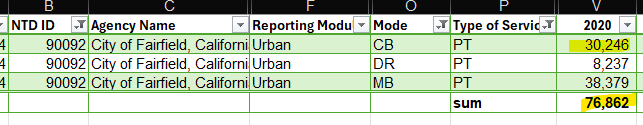



similar story for MST
- has 4 rows the different modes and tos, total vrh for 2020 = 312,161. Matches my aggregation
- operator data sheet shows 161,501 (same as MB, DO row)
- 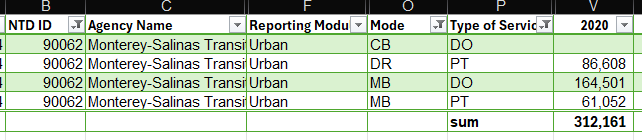